# FFT of .wav file

## Import packages

In [138]:
#https://docs.scipy.org/doc/scipy/tutorial/fft.html and 
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api

%matplotlib inline

## Define Functions to perform FFT and plot spectrum

In [142]:
def fft_wav(filename):
    sampFreq, data = wavfile.read(filename)

    fft_spectrum = np.fft.rfft(data)
    freq = np.fft.rfftfreq(data.size, d=1./sampFreq)
    fft_spectrum_abs = np.abs(fft_spectrum)

    max_mag = 0
    max_freq = 0
    for f in range(len(freq)):
        if (fft_spectrum_abs[f] > max_mag):
            max_mag = fft_spectrum_abs[f]
            max_freq = freq[f]
    print (max_freq, max_mag)
def plot_fft(filename):
    sampFreq, data = wavfile.read(filename)

    fft_spectrum = np.fft.rfft(data)
    freq = np.fft.rfftfreq(data.size, d=1./sampFreq)
    fft_spectrum_abs = np.abs(fft_spectrum)
    
    plt.plot(freq[:3000], fft_spectrum_abs[:3000])
    plt.xlabel("frequency, Hz")
    plt.ylabel("Amplitude, units")
    plt.show()

  

## Running FFT on pure 100 Hz sine wave

/usr/lib/python3/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


100.0 2499282390.723456
100.0 2499282390.723456
100.0 2499282390.723456
100.0 2499282390.723456
1 loop, best of 3: 479 ms per loop


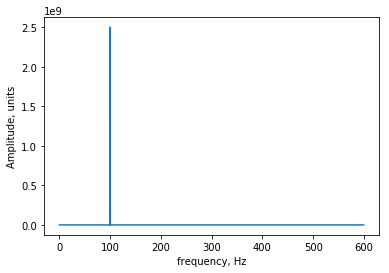

In [143]:
filename = '100hz.wav'
%timeit fft_wav(filename)
plot_fft(filename)
#warning due to mono format of wav file -- safe to ignore

## Running FFT on audio recording of open E string (~ 82 Hz)

82.57935664811117 420432729.20304656
82.57935664811117 420432729.20304656
82.57935664811117 420432729.20304656
82.57935664811117 420432729.20304656
1 loop, best of 3: 2.13 s per loop


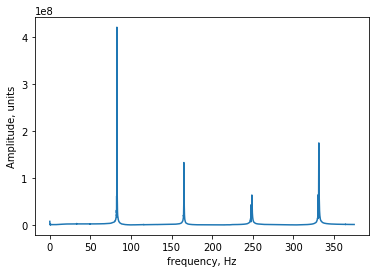

In [146]:
filename = 'lowE.wav'
%timeit fft_wav(filename)
plot_fft(filename)
#Processing takes longer because harmonics are included since this is a real guitar note rather than a sine wave
#Fundamental frequency of 82 Hz